<a href="https://colab.research.google.com/github/sobti/TSAI/blob/master/AUG_DATA/Aug_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from google.colab import drive
import os
import sys
drive.mount('/content/gdrive/')
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')
os.chdir('/content/gdrive/My Drive/Colab Notebooks')

Mounted at /content/gdrive/


In [11]:
!7z x '/content/gdrive/My Drive/Colab Notebooks/covid.7z' -o'/content/data/'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/gdrive/My Drive/Colab Notebooks/                                                   1 file, 1219425895 bytes (1163 MiB)

Extracting archive: /content/gdrive/My Drive/Colab Notebooks/covid.7z
--
Path = /content/gdrive/My Drive/Colab Notebooks/covid.7z
Type = 7z
Physical Size = 1219425895
Headers Size = 21270
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      0% 12 - covid/COVID-19/COVID-19 (106).png                                             1% 58 - covid/COVID-19/COVID-19 (28).png                            

In [57]:
large_drones=[]
label=[]
label_c=[]
bird_drones=[]
winged_drones=[]
dataset=[]
dataset_c=[]
import numpy as np
from PIL import Image

count=1  # to restrict the data to few thousand


# Getting the BG list and replicate each background to 4000 


for root_covid, dirs_covid, files_covid in os.walk("/content/data/covid/COVID-19/"):
   for name_covid in files_covid:
         p= Image.open(root_covid +'/'+ name_covid)
         dataset.append(root_covid +'/'+ name_covid)
         label.append(0)

In [83]:
tot_covid={}
tot_covid={'xray' : dataset}

In [84]:
len(tot_covid['xray'])

219

In [115]:
import torch
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomRotation((-5,5),fill=(0))
        ])

In [116]:
class Myclass(torch.utils.data.Dataset):
    def __init__ (self,tot_xray,total,transform=None):
       #super(depthmask, self).__init__()
       self.tot_xray = tot_xray
       self.total=total
       self.transform = transform
       

    def __getitem__ (self, idx): 
      
         xray = Image.open(self.tot_xray['xray'][idx]).convert('RGB')
      
         final_xray = self.transform(xray)
    
         sample = {'total_xray' : final_xray}
         #final_xray = self.transform[1](xray_n)
         #sample = {'total_xray' : final_xray , 'labels' : self.tot_xray['labels'][idx] }
         #final_xray = self.transform[1](xray_p)
         #sample = {'total_xray' : final_xray , 'labels' : self.tot_xray['labels'][idx] }
         return sample
    
    def __len__ (self):
       return len(self.tot_xray['xray'])

   
  





In [117]:
final_dataset = Myclass(tot_covid,219,transform)

In [118]:
for i in range(len(final_dataset)):
    sample = final_dataset[i]
    #xray = Image.open(sample['total_xray'])
    loc='/content/gdrive/My Drive/Colab Notebooks/covid/covid_n' + str(i) + '.png'
    sample['total_xray'].save(loc)

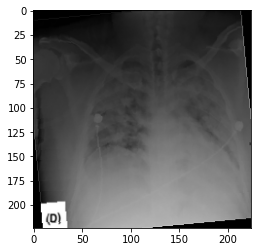

In [89]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow((np.transpose((sample['total_xray']),(0,1,2))))
